In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter

In [45]:
dataset_path = 'lfw_dataset'
img_size = (224, 224)

In [47]:
people = [p for p in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, p))]
print(f"Total identities: {len(people)}")

Total identities: 1


In [49]:
identity_counts = {person: len(os.listdir(os.path.join(dataset_path, person))) for person in people}
most_common = Counter(identity_counts).most_common(10)
print("Top 10 identities with most images:", most_common)

Top 10 identities with most images: [('lfw_dataset', 5749)]


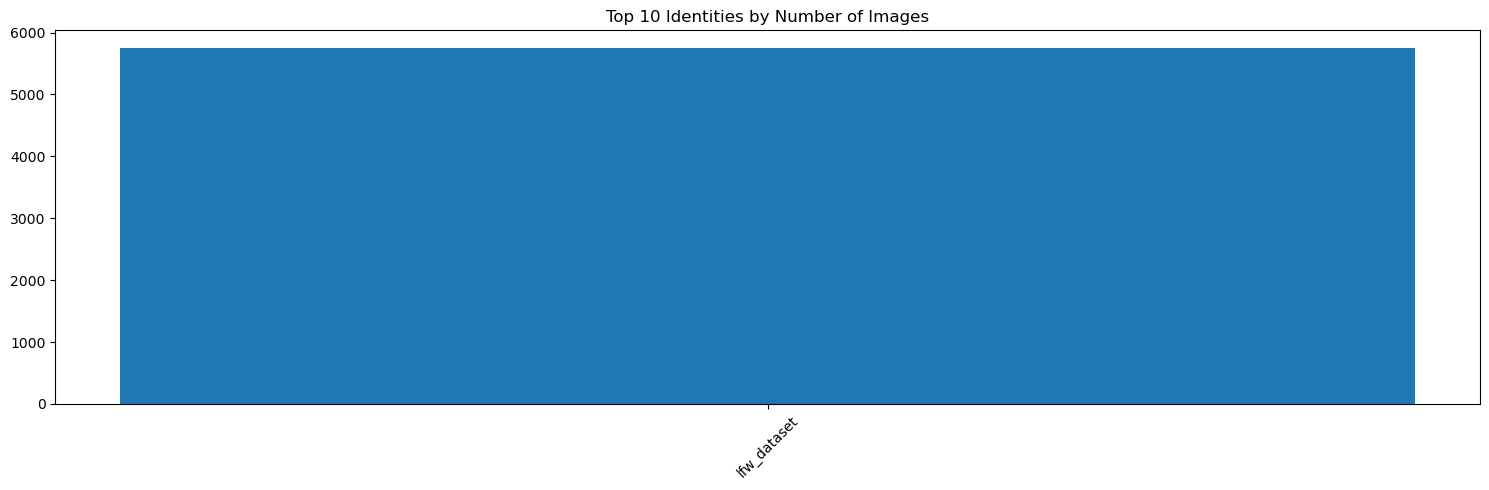

In [51]:
plt.figure(figsize=(15,5))
plt.bar(*zip(*most_common))
plt.title("Top 10 Identities by Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
sample_images = []
resolutions = []

In [55]:
for person in people[:3]:
    person_path = os.path.join(dataset_path, person)
    for img_file in os.listdir(person_path)[:2]:
        img_path = os.path.join(person_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            resolutions.append(img.shape[:2])
            sample_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print(f"Sample image resolutions: {resolutions[:5]}")

Sample image resolutions: []


In [57]:
plt.figure(figsize=(15, 5))
for i, img in enumerate(sample_images):
    plt.subplot(1, len(sample_images), i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle("Sample Images")
plt.show()

<Figure size 1500x500 with 0 Axes>

In [59]:
processed_images = []
labels = []
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [67]:
for person in people:
    person_path = os.path.join(dataset_path, person)
    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Could not read image: {img_path}")
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        if len(faces) == 0:
            print(f"No face found in: {img_path}")
        for (x, y, w, h) in faces:
            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, img_size)
            face = face / 255.0
            processed_images.append(face)
            labels.append(person)
            break

print(f"Total processed images: {len(processed_images)}")

Could not read image: lfw_dataset\lfw_dataset\Aaron_Eckhart
Could not read image: lfw_dataset\lfw_dataset\Aaron_Guiel
Could not read image: lfw_dataset\lfw_dataset\Aaron_Patterson
Could not read image: lfw_dataset\lfw_dataset\Aaron_Peirsol
Could not read image: lfw_dataset\lfw_dataset\Aaron_Pena
Could not read image: lfw_dataset\lfw_dataset\Aaron_Sorkin
Could not read image: lfw_dataset\lfw_dataset\Aaron_Tippin
Could not read image: lfw_dataset\lfw_dataset\Abbas_Kiarostami
Could not read image: lfw_dataset\lfw_dataset\Abba_Eban
Could not read image: lfw_dataset\lfw_dataset\Abdel_Aziz_Al-Hakim
Could not read image: lfw_dataset\lfw_dataset\Abdel_Madi_Shabneh
Could not read image: lfw_dataset\lfw_dataset\Abdel_Nasser_Assidi
Could not read image: lfw_dataset\lfw_dataset\Abdoulaye_Wade
Could not read image: lfw_dataset\lfw_dataset\Abdulaziz_Kamilov
Could not read image: lfw_dataset\lfw_dataset\Abdullah
Could not read image: lfw_dataset\lfw_dataset\Abdullah_Ahmad_Badawi
Could not read image:

In [69]:
X = np.array(processed_images)
y = np.array(labels)

In [73]:
if X.shape[0] == 0:
    print("No faces processed. Consider using a different face detector or tuning detection params.")
else:
    augmentor = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.15,
        horizontal_flip=True
    )

    augmentor.fit(X)
    print("✅ Data augmentation setup complete.")

No faces processed. Consider using a different face detector or tuning detection params.
